#Section 5


---

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation

from keras.datasets import mnist 

In [ ]:
def load_data():
    
    return mnist.load_data()

In [ ]:
def prepare_data(train_images, test_images):

    x_train = train_images.reshape((60000, 784))
    x_train = x_train.astype('float32')/255

    x_test = test_images.reshape((10000, 784))
    x_test = x_test.astype('float32')/255

    return (x_train, x_test )

In [ ]:
def add_noise(x_train, x_test, noise_factor_train, noise_factor_test):

    x_train_noisy = x_train + noise_factor_train * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape) 
    x_test_noisy = x_test + noise_factor_test * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

    x_train_noisy = np.clip(x_train_noisy, 0., 1.)
    x_test_noisy = np.clip(x_test_noisy, 0., 1.)

    return x_train_noisy, x_test_noisy

In [ ]:
def model(x_train, y_train, x_test, y_test ):
    
    model = Sequential()
    # 128 , 64 / 64 , 32
    model.add(Dense(128, activation='relu', input_shape=(784,)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(784, activation = 'sigmoid'))

    model.summary()

    model.compile(optimizer='adam', loss='binary_crossentropy')

    history = model.fit(x_train, y_train,
            batch_size=512, epochs=25, verbose=0,
            validation_data=(x_train, y_train))

    denoise_image_test = model.predict(x_test)    

    return history, denoise_image_test

In [ ]:
def show_result(x_test_noisy, test_images, denoise_image_test):
    n = 10
    for i in range(n):
        # Display original
        ax = plt.subplot(3, n, i + 1)
        plt.imshow(test_images[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display noisy 
        ax = plt.subplot(3, n, i + 1 + n)
        plt.imshow(x_test_noisy[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(3, n, i + 1 + 2*n )
        plt.imshow(denoise_image_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

In [ ]:
def plot(history):
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

In [ ]:
def main(noise_factor_train = 0.4, noise_factor_test = 0.7):

    (train_images, _), (test_images, _) = load_data()
   
    x_train, x_test = prepare_data(train_images, test_images)

    x_train_noisy, x_test_noisy = add_noise(x_train, x_test, noise_factor_train, noise_factor_test)


    history, denoise_image_test = model(x_train_noisy, x_train, x_test_noisy, x_test)
    
    show_result(x_test_noisy, test_images, denoise_image_test)

    plot(history)

11493376/11490434 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 784)               50960     
Total params: 159,696
Trainable params: 159,696
Non-trainable params: 0
_________________________________________________________________


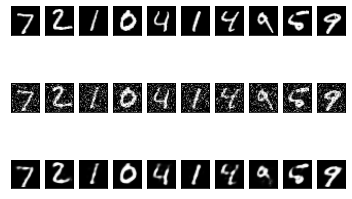

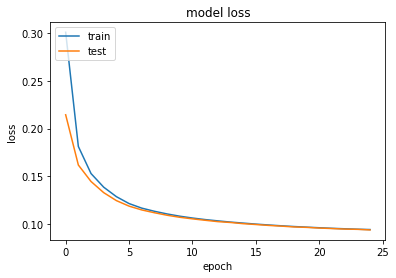

In [ ]:
main(noise_factor_train = 0.3, noise_factor_test = 0.3)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_4 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_5 (Dense)              (None, 784)               50960     
Total params: 159,696
Trainable params: 159,696
Non-trainable params: 0
_________________________________________________________________


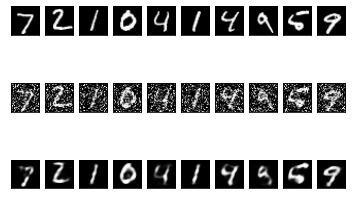

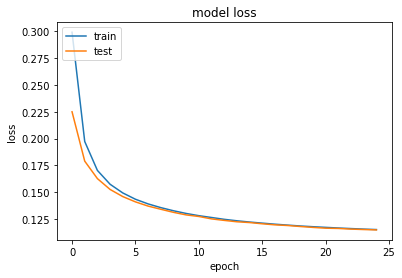

In [ ]:
main(noise_factor_train = 0.5, noise_factor_test = 0.5)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_8 (Dense)              (None, 784)               50960     
Total params: 159,696
Trainable params: 159,696
Non-trainable params: 0
_________________________________________________________________


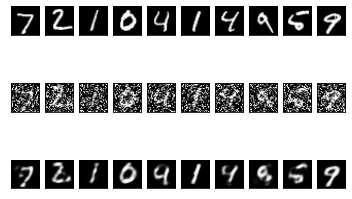

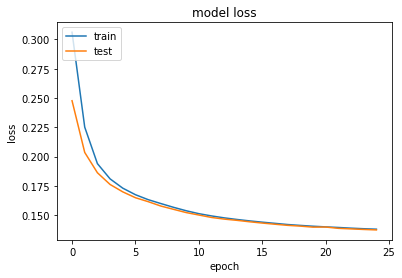

In [ ]:
main(noise_factor_train = 0.7, noise_factor_test = 0.7)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 784)               50960     
Total params: 159,696
Trainable params: 159,696
Non-trainable params: 0
_________________________________________________________________


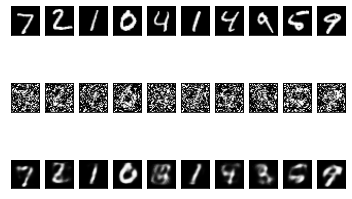

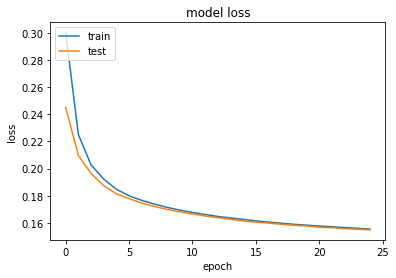

In [ ]:
main(noise_factor_train = 0.9, noise_factor_test = 0.9)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_13 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_14 (Dense)             (None, 784)               50960     
Total params: 159,696
Trainable params: 159,696
Non-trainable params: 0
_________________________________________________________________


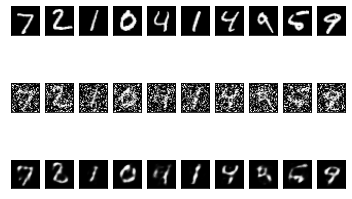

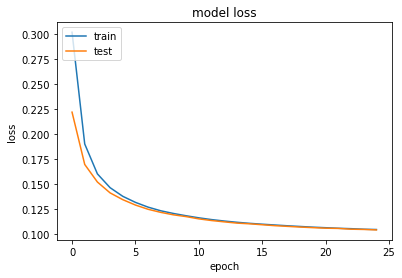

In [ ]:
main(noise_factor_train = 0.4, noise_factor_test = 0.7)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_19 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_20 (Dense)             (None, 784)               50960     
Total params: 159,696
Trainable params: 159,696
Non-trainable params: 0
_________________________________________________________________


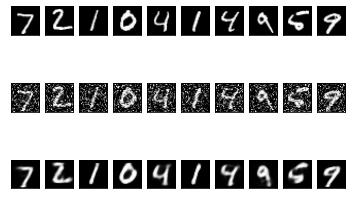

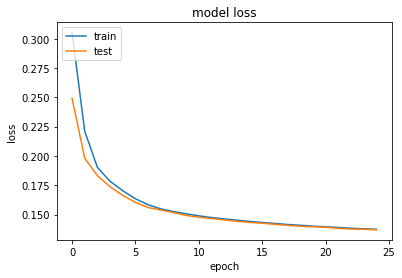

In [ ]:
main(noise_factor_train = 0.7, noise_factor_test = 0.4)